In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split

import pickle

In [2]:
pickle_in = open("pickle/X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("pickle/y.pickle", "rb")
y = pickle.load(pickle_in)


In [3]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  4796 
Length of our Testing data:  1199


In [4]:
# Initialize  models
knn = KNeighborsClassifier(n_neighbors=100)
#Using scikit
from sklearn import svm
svm_classifier = svm.SVC(kernel='poly', C=1.0, probability=True)
radmon_fs = RandomForestClassifier(n_estimators=100,random_state=45)
# using cnn

In [5]:
# Kết hợp các mô hình
voting = VotingClassifier(estimators=[('knn', knn), ('svm', svm_classifier),('random_forest', radmon_fs)], voting='hard')
voting.fit(X_train, y_train)
pickle.dump(voting,open("models/voting.pkl","wb"))

In [6]:
# make prediction on entire test data
predictions_set = voting.predict(X_test)
predictions_set





array([2, 2, 0, ..., 2, 1, 2])

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Evaluate the voting classifier
print('KNN Accuracy: ' + str(accuracy_score(y_test, predictions_set)))


acc = accuracy_score(y_test, predictions_set)
precision = precision_score(y_test, predictions_set, average='macro')
recall = recall_score(y_test, predictions_set, average='macro')
f1 = f1_score(y_test, predictions_set, average='macro')
pickle.dump([acc,precision,recall,f1],open("models/voting_quality.pkl","wb"))


KNN Accuracy: 0.9124270225187656


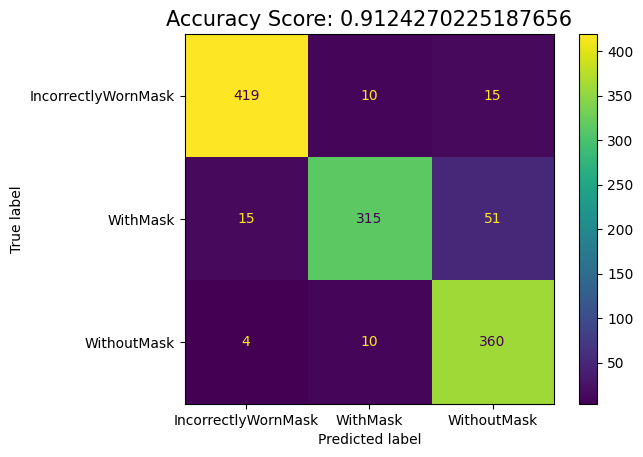

In [8]:
# Calculate Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt # to plot inage, graph


# plot_confusion_matrix
class_names = ['IncorrectlyWornMask', 'WithMask','WithoutMask']

cnf_matrix = confusion_matrix(y_test, predictions_set)
disp = ConfusionMatrixDisplay(cnf_matrix,display_labels = class_names)
disp.plot()
plt.savefig("imagemodels/voting_confusion.png",dpi=120)
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set))
plt.title(all_sample_title,size=15)
plt.show()

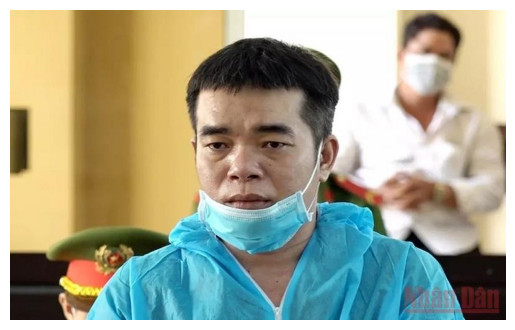

[0]
dự đoán: IncorrectlyWornMask


In [9]:
# Test predict
from keras.preprocessing import image

imgshow = image.load_img("imgthucte/incorrect1.jpeg")
plt.imshow(imgshow)
plt.axis('off')
plt.show()
imgpre = image.load_img("imgthucte/incorrect1.jpeg", target_size=(32,32))
imgpre_array = image.img_to_array(imgpre)
imgpre_array = np.array(imgpre_array, dtype='float32')/255.0
imgpre_array = imgpre_array.reshape(-1,)
imgpre_array.shape
pre2 = voting.predict([imgpre_array])

switcher = { 0 : 'IncorrectlyWornMask',1 :'WithMask', 2 :'WithoutMask'}

print(pre2)
print("dự đoán:",switcher.get(pre2[0], "nothing"))